## Readability of Indigenous Services Canada project descriptions

### Step 1: Prepare and clean project descriptions for analysis

Load libraries and dataset. 
Clean the project descriptions with Textatistic's tool punct_clean. The data has already been manually reviewed and updated to eliminate bullet points and non-sentence ending full stops.

In [1]:
import pandas as pd

#readability library
import textatistic
from textatistic import Textatistic

#graph libraries
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
ISC = pd.read_excel("data/processed/ISC_50select_clean.xlsx")
ISC.head(3)

,Unnamed: 0,project number,project_name_en,project_name_fr,RA_ID,description_en,description_fr,status_en,created_at,eaStartDate,responsible_authorities_en,responsible_authorities_fr,wordcount,descript_clean
0,348,80868,Pipeline Riser on Sunchild IR 202,Riser de pipeline sur Réserve indienne Sunchil...,ISC,The proposed pipeline riser is associated with...,La colonne montante propose est associ&eacute;...,Completed,2020-08-11 14:46:41.720,2020-07-25,Indigenous Services Canada,Services aux Autochtones Canada,129,The proposed pipeline riser is associated with...
1,152,81467,Muskoday Convenience Store Remediation,Assainissement du dépanneur Muskoday,ISC,&nbsp;The Proposed Project\r\n\r\nAn environme...,Le projet propos&eacute;\r\n\r\n\r\nUn consult...,Completed,2021-03-22 16:35:13.957,2021-05-01,Indigenous Services Canada,Services aux Autochtones Canada,159,\n\nAn environmental consultant has identified...
2,547,80223,Basadinaa - Crooked Lake Cottage Lots,Basadinaa - Lots de chalets du lac Crooked,ISC,The project area is comprised of the Designate...,La zone du projet comprend la zone des chalets...,Completed,2019-09-30 09:58:11.057,2019-09-30,Indigenous Services Canada,Services aux Autochtones Canada,151,The project area is comprised of the Designate...


In [4]:
# reduce the table

ISC_data = ISC[["project number", "descript_clean"]].copy()

In [5]:
#clean the project description text and create a new column with the ready-to-analyse text
ISC_data["descr_ready"] = ISC_data["descript_clean"].apply(textatistic.punct_clean)

### Step 2: Readability scores

Calculate the scores and send to new columns.

In [6]:
ISC_data["flesch_re"] = ISC_data["descr_ready"].apply(textatistic.flesch_score)
ISC_data["flesch_kin"] = ISC_data["descr_ready"].apply(textatistic.fleschkincaid_score)
ISC_data["dalechall"] = ISC_data["descr_ready"].apply(textatistic.dalechall_score)
ISC_data["fog"] = ISC_data["descr_ready"].apply(textatistic.gunningfog_score)
ISC_data.head()

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
0,80868,The proposed pipeline riser is associated with...,The proposed pipeline riser is associated with...,51.247452,11.866583,11.260603,14.446523
1,81467,\n\nAn environmental consultant has identified...,\n\nAn environmental consultant has identified...,48.534536,11.303024,10.811629,14.459677
2,80223,The project area is comprised of the Designate...,The project area is comprised of the Designate...,31.875714,15.769286,13.484229,18.342857
3,81206,Construction of a new solid waste transfer sta...,Construction of a new solid waste transfer sta...,70.599712,7.449038,9.867782,11.423077
4,80796,The Water Treatment Plant (WTP) in Garden Vill...,The Water Treatment Plant (WTP) in Garden Vill...,53.420093,12.217736,10.057110,14.040930


### Step 3: Analyse the results

Start with basic descriptive statistics.

### Flesch reading ease

In Flesch reading ease, a score between 60 and 70 is considered "plain English," according to R. Flesch.

In [7]:
ISC_data["flesch_re"].describe()

count    43.000000
mean     55.546068
std      10.957013
min      31.875714
25%      49.592361
50%      55.819354
75%      62.394625
max      78.488716
Name: flesch_re, dtype: float64

What is the most readable text (max score)?

In [8]:
ISC_data[ISC_data.flesch_re == ISC_data.flesch_re.max()] # most readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
5,81079,\n\nDesign and construct a new water treatment...,\n\nDesign and construct a new water treatment...,78.488716,6.180105,9.623889,7.696461


In [11]:
print(ISC_data.iloc[5,1])



Design and construct a new water treatment plant for Star Blanket First Nation to be located on S10 TP23 R11 W2M. The new plant will include concrete reservoir with a capacity of 420,000 liters, one new well with pump and raw water supply line, bio-filter pre-treatment, membrane final treatment and distribution pumping. The plant will provide 2.0 lps of treated water. The buiding size is approximately 500 m2. The new building is located just north west of the old water plant in the main core area. New three phase power line approximately 5.2 km in length. The life span is expected to be 50 to 100 years.


The "most readable" text suggests to me that Flesch RE rewards brevity, even if the brevity impairs communication. 
This will support my recommendation that Parks instruct writers to above all consider the reader when they're preparing these briefs.  

What is the least readable (min score)?

In [12]:
ISC_data[ISC_data.flesch_re == ISC_data.flesch_re.min()] # least readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
2,80223,The project area is comprised of the Designate...,The project area is comprised of the Designate...,31.875714,15.769286,13.484229,18.342857


In [13]:
print(ISC_data.iloc[2, 1])

The project area is comprised of the Designated Cottage Area within Shesheep IR 74A and Sakimay IR 74. The area is not a new development, but the renewal of leases on a previously developed cottage lot area. The scope of the project includes the continued construction (as applicable), operation and maintenance of a cottage and/or other dwellings (i.e. mobile home, camper trailer), on a cottage lot (residential/recreational lease) situated on Sakimay First Nation Reserve lands (the project). The environmental assessment framework was designed to satisfy Zagime's environmental management responsibilities under the Delegated Authority level of the Reserve Land and Environmental Management Program (RLEMP) and ISC's responsibilities under the Impact Assessment Act.




These are long sentences and big, abstract, words.

### Flesch Kincaid grade level


In [14]:
ISC_data["flesch_kin"].describe()

count    43.000000
mean     11.026097
std       2.962106
min       6.180105
25%       9.156215
50%      10.680610
75%      12.101725
max      19.282308
Name: flesch_kin, dtype: float64

In [15]:
ISC_data[ISC_data.flesch_kin == ISC_data.flesch_kin.min()] # most readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
5,81079,\n\nDesign and construct a new water treatment...,\n\nDesign and construct a new water treatment...,78.488716,6.180105,9.623889,7.696461


In [16]:
ISC_data[ISC_data.flesch_kin == ISC_data.flesch_kin.max()] # least readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
14,80238,The Animakee Wa Zing First Nation community of...,The Animakee Wa Zing First Nation community of...,33.999359,19.282308,11.980372,21.333333


Agreement with Flesch Reading Ease that 81079 is the most readable.
Identifies different text for least readable.

In [17]:
print(ISC_data.iloc[14, 1])

The Animakee Wa Zing First Nation community of Windigo Island requires a new water treatment plant (WTP) and storage reservoir to replace the exsiting water treatment system currently in the community. The project will include installing two new water intake pipes into the Lake of the Woods approximately 150 m off of the shore, a new reject water outfall pipe approximately 100 m into the lake, constructing a new WTP building adjacent to the existing WTP, installing above ground water reservoir tanks, installinga marine crossing pipe between Windigo Island and Windfall Island, installing six dry hydrants into the lake for fire flows and extending the watermains to unserviced houses in the community. The water treatment system will be sized for the to design year 20, based on projected population growth.

 


Very long sentence in the "least readable" text. It seems the author has not thought about the reader at all.

### Dale Chall score

In [18]:
ISC_data["dalechall"].describe()

count    43.000000
mean     10.814684
std       1.026135
min       8.824602
25%      10.063590
50%      10.795473
75%      11.261567
max      13.484229
Name: dalechall, dtype: float64

In [19]:
ISC_data[ISC_data.dalechall == ISC_data.dalechall.min()] # most readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
39,81259,The Carry The Kettle First Nation is building ...,The Carry The Kettle First Nation is building ...,71.731132,7.502392,8.824602,9.880936


In [20]:
print(ISC_data.iloc[39, 1])

The Carry The Kettle First Nation is building a new convenience store and gas station . The First Nation will prepare the site for construction of the new structure on a surveyed lot located on Assiniboine IR 76. Business will be owned by the Carry The Kettle First Nation . The proposed site 5,500 square meters (1.36 acres), and offers easy access from Saskatchewan Grid #606. There will be 2 full-service pumps and a 2 story convenience store that measures 678 square meters, second floor is 74 square meter and public washroom facilities. The fuels will be contained in an above-ground 3 compartment split tank. Regular Unleaded (30,000 L), diesel (20,000L) and premium (10,000L). A separate propane tank will be on site for store use (heating and kitchen use).  During construction, all waste generated will be discarded to the local landfill situated on Carry The Kettle First Nation. All waste generated once the convenience store and Gas Station is operational will be placed at the Carry The

In [21]:
ISC_data[ISC_data.dalechall == ISC_data.dalechall.max()] # least readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
2,80223,The project area is comprised of the Designate...,The project area is comprised of the Designate...,31.875714,15.769286,13.484229,18.342857


Agreement with Flesch Reading Ease that the least readable is 80223. 
New selection for most readable,81259, which uses simple language and is broken up into short sentences.

### Fog index

In [22]:
ISC_data["fog"].describe()

count    43.000000
mean     13.839003
std       2.978173
min       7.696461
25%      11.545351
50%      13.798870
75%      14.834493
max      21.333333
Name: fog, dtype: float64

In [24]:
ISC_data[ISC_data.fog == ISC_data.fog.min()] # most readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
5,81079,\n\nDesign and construct a new water treatment...,\n\nDesign and construct a new water treatment...,78.488716,6.180105,9.623889,7.696461


In [25]:
ISC_data[ISC_data.fog == ISC_data.fog.max()] # least readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
14,80238,The Animakee Wa Zing First Nation community of...,The Animakee Wa Zing First Nation community of...,33.999359,19.282308,11.980372,21.333333


Agreement in both cases with the Flesch Kincaid grade level.

### Step 4: Graph the results

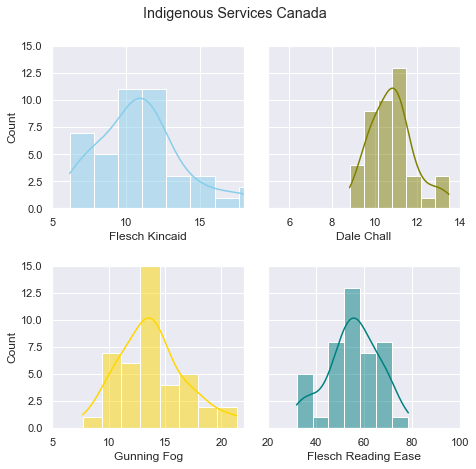

In [26]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharey=True)


sns.histplot(data=ISC_data, x="flesch_kin", kde=True, color="skyblue", 
             ax=axs[0, 0]).set(xlabel="Flesch Kincaid")
sns.histplot(data=ISC_data, x="dalechall", kde=True, color="olive", 
             ax=axs[0, 1]).set(xlabel = "Dale Chall")
sns.histplot(data=ISC_data, x="fog", kde=True, color="gold", 
             ax=axs[1, 0]).set(xlabel = "Gunning Fog")
sns.histplot(data=ISC_data, x="flesch_re", kde=True, color="teal", 
             ax=axs[1, 1]).set(xlabel = "Flesch Reading Ease")


fig.tight_layout(pad = 2, rect=[0, 0.03, 1, 0.95]) # add space between subplot rows and main title

for ax in axs: # make the y axis the same for all subplots
    plt.setp(ax, ylim=(0,15))

axs[0,0].set_xlim(5,18)  # flesch-kincaid x-axis
axs[1,0].set_xlim(5, 22) # gunning fog x-axis
axs[0,1].set_xlim(5, 14) # dale chall
axs[1,1].set_xlim(20, 100) # flesch reading ease
    
fig.suptitle("Indigenous Services Canada")
plt.show()

### Step 5: Save scores 

In [27]:
# ISC_data.to_excel("data/processed/ISC_scores.xlsx", index = False)